<a href="https://colab.research.google.com/github/qweliant/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-18 12:21:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-18 12:21:10 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [4]:
# Load Data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)

(435, 17)


In [5]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1}) #use this to create bool table

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [7]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [8]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [9]:
cols = list(rep.columns)
cols.remove('party')
cols

['handicapped-infants',
 'water-project',
 'budget',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups',
 'anti-satellite-ban',
 'aid-to-contras',
 'mx-missile',
 'immigration',
 'synfuels',
 'education',
 'right-to-sue',
 'crime',
 'duty-free',
 'south-africa']

In [0]:
party_stats = {} # creates a empty dictionary
for party in ['democrat', 'republican']:
    party_data = df[df['party']==party]
    party_stats[party] = {'means': [], 'confidence_intervals': [], 'standard_errors': [], 'margins_of_error': []}
	
    for c in cols:
        n = party_data[c].count()
        dof = n - 1
        mean = party_data[c].mean()
        std_err = np.std(party_data[c],ddof=1) / np.sqrt(n)
        confidence_interval = stats.t.interval(0.95, dof, loc=mean, scale=std_err)
        margin_of_error = std_err * stats.t.ppf(0.975, dof)
        party_stats[party]['means'].append(mean)
        party_stats[party]['confidence_intervals'].append(confidence_interval)
        party_stats[party]['margins_of_error'].append(margin_of_error)
        party_stats[party]['standard_errors'].append(std_err)

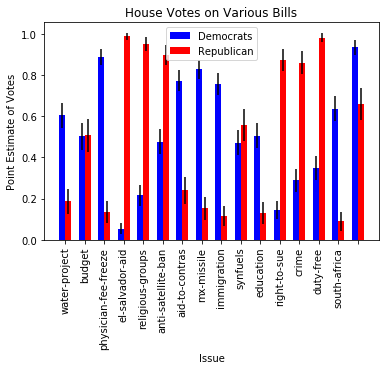

In [11]:
x = np.arange(len(cols))
width = 0.3

plt.bar(x-width/2, party_stats['democrat']['means'], 
           width=width, yerr=party_stats['democrat']['margins_of_error'],
           color='blue', ecolor='black', label='Democrats' )

plt.bar(x+width/2, party_stats['republican']['means'], 
           width=width, yerr=party_stats['republican']['margins_of_error'],
           color='red', ecolor='black', label='Republican' )


plt.ylabel('Point Estimate of Votes')
plt.xlabel('Issue')
plt.title('House Votes on Various Bills')
plt.legend()
plt.xticks(x, cols[1:], rotation='vertical')
plt.show()

# Chi Sqaured Test

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/qweliant/GenderAndSex/master/green/pcs.csv?token=AII7DUISBJZ7Z4OWI7VPLG25RLI7K', na_values=" ?")
print(df.shape)
df.head()

(179096, 67)


,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2015,INPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,113
1,2015,INPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,YES,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,NO,NO,YES,NO,UNKNOWN,NO,NO,UNKNOWN,YES,113
2,2015,INPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,107
3,2015,INPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,YES,888
4,2015,INPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,YES,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NOT MI - ORGANIC MENTAL DISORDER,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,NO,117


In [13]:
df.describe(exclude='number')

,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status
count,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096,179096
unique,5,5,3,3,4,6,3,5,4,4,7,3,5,5,7,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,6,6,3,3,3,3,3,3,3,3,2,3,4,3,3,3,3,3
top,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
freq,119206,86949,143213,89922,171589,145005,133965,92256,141338,99615,159987,168871,127460,152440,97353,144693,166407,153640,162028,160051,151043,144200,161663,160518,140084,128915,141989,136075,160029,159979,154522,142897,161119,159515,157933,153159,159891,159591,147261,158244,132509,95270,161899,117457,159614,141850,143083,167521,99369,101470,128530,163948,163983,130818,146008,142562,163266,173977,131435,74988,132258,146509,166016,158819,147646


In [14]:
df['Sex'].value_counts()

FEMALE     89922
MALE       88798
UNKNOWN      376
Name: Sex, dtype: int64

In [15]:
df['Sexual Orientation'].value_counts()

STRAIGHT OR HETEROSEXUAL    145005
UNKNOWN                      17609
CLIENT DID NOT ANSWER         6185
LESBIAN OR GAY                5053
BISEXUAL                      4157
OTHER                         1087
Name: Sexual Orientation, dtype: int64

In [16]:
df = df.sort_values(by='Sexual Orientation', ascending=True)
df.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
167580,2015,OUTPATIENT,LONG ISLAND REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",BISEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,"UNEMPLOYED, LOOKING FOR WORK",NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,YES,MENTAL ILLNESS,MENTAL ILLNESS,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,888
73490,2015,OUTPATIENT,WESTERN REGION,CHILD,FEMALE,"NO, NOT TRANSGENDER",BISEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NO,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,144
145012,2015,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",BISEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,LIVES ALONE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO,NO,YES,NO,NO,NO,NO,YES,YES,YES,YES,MENTAL ILLNESS,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,YES,YES,NO,NO,NO,NO,YES,NO,NO,YES,YES,YES,NO,NO,NO,NO,104
6055,2015,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",BISEXUAL,YES,OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,SPANISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,YES,YES,UNKNOWN,YES,UNKNOWN,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,MENTAL ILLNESS,NOT MI - OTHER,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NOT APPLICABLE,NO,YES,UNKNOWN,UNKNOWN,NO,126
176335,2015,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",BISEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,YES,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,113


In [17]:
contingency_table = pd.crosstab([df['Sex'], df['Transgender']], df['Sexual Orientation'], margins=True)
contingency_table

Sexual Orientation            BISEXUAL  CLIENT DID NOT ANSWER  ...  UNKNOWN     All
Sex     Transgender                                            ...                 
FEMALE  CLIENT DIDN'T ANSWER        18                    253  ...       40     456
        NO, NOT TRANSGENDER       2981                   2000  ...     5436   86624
        UNKNOWN                     22                     25  ...     1866    2222
        YES, TRANSGENDER            74                     48  ...       51     620
MALE    CLIENT DIDN'T ANSWER        13                    370  ...       32     582
        NO, NOT TRANSGENDER        951                   3140  ...     7810   84923
        UNKNOWN                     24                    287  ...     1970    2647
        YES, TRANSGENDER            74                     59  ...       73     646
UNKNOWN CLIENT DIDN'T ANSWER         0                      2  ...        1       6
        NO, NOT TRANSGENDER          0                      0  ...        7      42
        UNKNOWN                      0                      1  ...      323     326
        YES, TRANSGENDER             0                      0  ...        0       2
All                               4157                   6185  ...    17609  179096

[13 rows x 7 columns]


# Naming is gender_na, gender_unknown, gender_not_trans, etc

In [18]:
female_na_trans = contingency_table.iloc[0][0:6].values
female_na_trans

array([ 18, 253,  17,  10, 118,  40])

In [19]:
female_not_trans = contingency_table.iloc[1][0:6].values
female_not_trans


array([ 2981,  2000,  2287,   525, 73395,  5436])

In [20]:
female_unknown_trans = contingency_table.iloc[2][0:6].values
female_unknown_trans


array([  22,   25,   46,   18,  245, 1866])

In [21]:
female_trans = contingency_table.iloc[3][0:6].values
female_trans


array([ 74,  48, 119, 102, 226,  51])

In [22]:
male_na_trans = contingency_table.iloc[4][0:6].values
male_na_trans


array([ 13, 370,  15,   8, 144,  32])

In [23]:
male_not_trans = contingency_table.iloc[5][0:6].values
male_not_trans


array([  951,  3140,  2372,   319, 70331,  7810])

In [24]:
male_unknown_trans = contingency_table.iloc[6][0:6].values
male_unknown_trans


array([  24,  287,   36,   11,  319, 1970])

In [25]:
male_trans = contingency_table.iloc[7][0:6].values
male_trans


array([ 74,  59, 156,  91, 193,  73])

In [26]:
unknown_na_trans = contingency_table.iloc[8][0:6].values
unknown_na_trans


array([0, 2, 0, 3, 0, 1])

In [27]:
unknown_not_trans = contingency_table.iloc[9][0:6].values
unknown_not_trans


array([ 0,  0,  4,  0, 31,  7])

In [28]:
unknown_unknown_trans = contingency_table.iloc[10][0:6].values
unknown_unknown_trans


array([  0,   1,   1,   0,   1, 323])

In [29]:
unknown_trans = contingency_table.iloc[11][0:6].values
unknown_trans


array([0, 0, 0, 0, 2, 0])

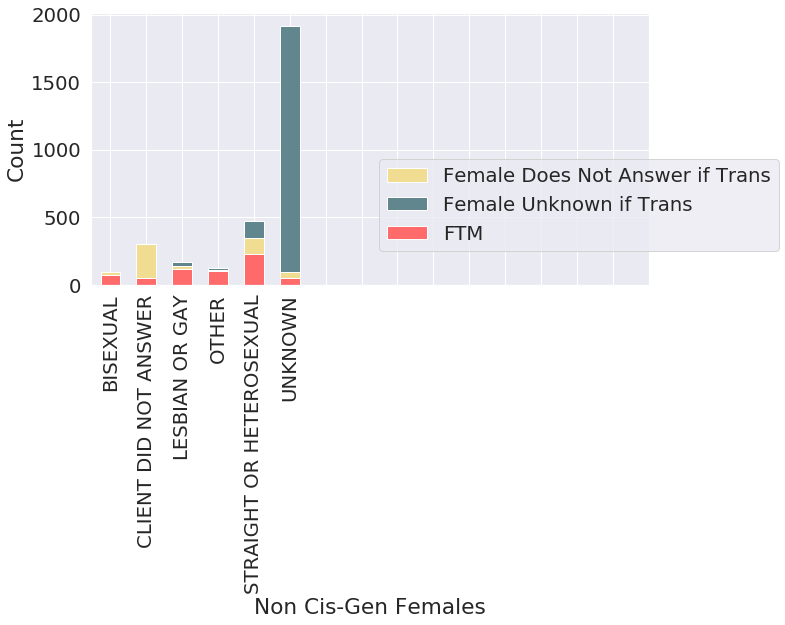

In [122]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['BISEXUAL', 'CLIENT DID NOT ANSWER', 'LESBIAN OR GAY', 'OTHER', 'STRAIGHT OR HETEROSEXUAL', 'UNKNOWN']

p1 = plt.bar(categories, female_trans, 0.55, color='#ff6b6b')
p2 = plt.bar(categories, female_unknown_trans, 0.55, bottom=female_trans, color='#61868d')
p3 = plt.bar(categories, female_na_trans, 0.55, bottom=female_trans, color='#f0dd92')


plt.legend((p3[0], p2[0], p1[0]), ('Female Does Not Answer if Trans','Female Unknown if Trans', 'FTM'), bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.xlabel('Non Cis-Gen Females')
plt.ylabel('Count')
plt.xticks(x, categories, rotation='vertical')

plt.show()

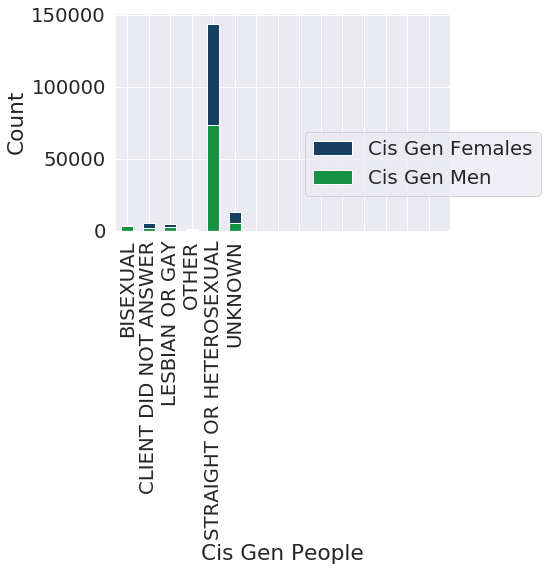

In [104]:
p1 = plt.bar(categories, female_not_trans, 0.55, color='#169244')
p2 = plt.bar(categories, male_not_trans, 0.55, bottom=female_not_trans, color='#173F5F')

plt.legend((p2[0], p1[0]), ('Cis Gen Females', 'Cis Gen Men'), loc='upper right', bbox_to_anchor=(0.8, 0., 0.5, 0.5))
plt.xlabel('Cis Gen People')
plt.ylabel('Count')
plt.xticks(x, categories, rotation='vertical')

plt.show()

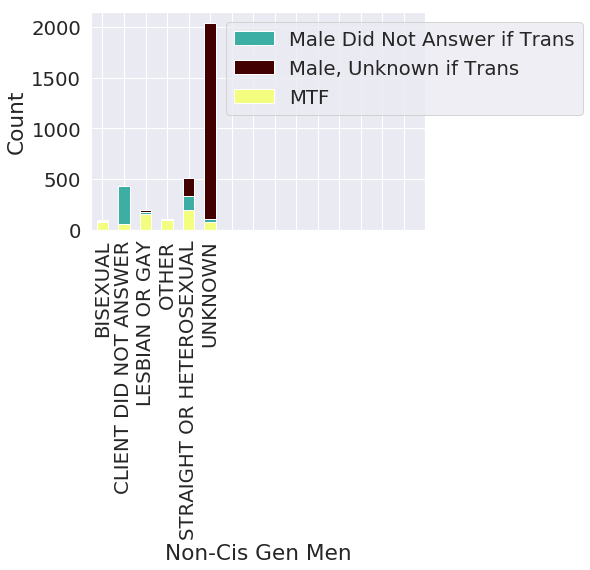

In [124]:
p1 = plt.bar(categories, male_trans, 0.55, color='#f3fe7e')
p2 = plt.bar(categories, male_unknown_trans, 0.55, bottom=male_trans, color='#420000')
p3 = plt.bar(categories, male_na_trans, 0.55, bottom=male_trans, color='#3caea3')

plt.legend((p3[0], p2[0], p1[0]), ('Male Did Not Answer if Trans', 'Male, Unknown if Trans', 'MTF' ), loc='upper right', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
plt.xlabel('Non-Cis Gen Men')
plt.ylabel('Count')
plt.xticks(x, categories, rotation='vertical')

plt.show()

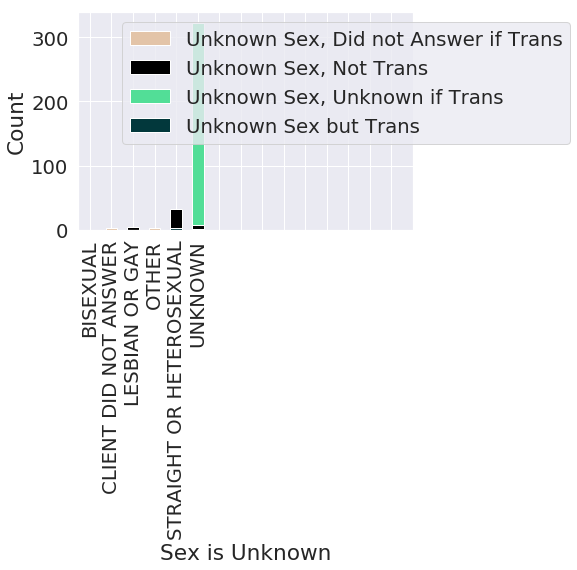

In [126]:
p1 = plt.bar(categories, unknown_trans, 0.55, color='#02383c')
p2 = plt.bar(categories, unknown_unknown_trans, 0.55, bottom=unknown_trans, color='#52de97')
p3 = plt.bar(categories, unknown_not_trans, 0.55, bottom=unknown_trans, color='#000000')
p4 = plt.bar(categories, unknown_na_trans, 0.55, bottom=unknown_trans, color='#e3c4a8')

plt.legend((p4[0], p3[0], p2[0], p1[0]), ( 'Unknown Sex, Did not Answer if Trans','Unknown Sex, Not Trans', 'Unknown Sex, Unknown if Trans', 'Unknown Sex but Trans' ), loc='upper right', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
plt.xlabel('Sex is Unknown')
plt.ylabel('Count')
plt.xticks(x, categories, rotation='vertical')

plt.show()

In [127]:
contingency_table

Sexual Orientation            BISEXUAL  CLIENT DID NOT ANSWER  ...  UNKNOWN     All
Sex     Transgender                                            ...                 
FEMALE  CLIENT DIDN'T ANSWER        18                    253  ...       40     456
        NO, NOT TRANSGENDER       2981                   2000  ...     5436   86624
        UNKNOWN                     22                     25  ...     1866    2222
        YES, TRANSGENDER            74                     48  ...       51     620
MALE    CLIENT DIDN'T ANSWER        13                    370  ...       32     582
        NO, NOT TRANSGENDER        951                   3140  ...     7810   84923
        UNKNOWN                     24                    287  ...     1970    2647
        YES, TRANSGENDER            74                     59  ...       73     646
UNKNOWN CLIENT DIDN'T ANSWER         0                      2  ...        1       6
        NO, NOT TRANSGENDER          0                      0  ...        7      42
        UNKNOWN                      0                      1  ...      323     326
        YES, TRANSGENDER             0                      0  ...        0       2
All                               4157                   6185  ...    17609  179096

[13 rows x 7 columns]

In [142]:
row_sums = contingency_table.iloc[0:12, 6].values
col_sums = contingency_table.iloc[12, 0:6].values
print(row_sums)
print(col_sums)

[  456 86624  2222   620   582 84923  2647   646     6    42   326     2]
[  4157   6185   5053   1087 145005  17609]


In [146]:
total = contingency_table.loc[['All','All'],'All']
print(total)

Sex  Transgender
All                 179096
Name: All, dtype: int64


In [144]:
df.shape[0]

179096

In [147]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(12, 6, 1)
[[[1.05842230e+01]
  [1.57477554e+01]
  [1.28655470e+01]
  [2.76763300e+00]
  [3.69200205e+02]
  [4.48346362e+01]]

 [[2.01063099e+03]
  [2.99152097e+03]
  [2.44400250e+03]
  [5.25753160e+02]
  [7.01350846e+04]
  [8.51700773e+03]]

 [[5.15748760e+01]
  [7.67357730e+01]
  [6.26913276e+01]
  [1.34861415e+01]
  [1.79904135e+03]
  [2.18470530e+02]]

 [[1.43908295e+01]
  [2.14114218e+01]
  [1.74926297e+01]
  [3.76300978e+00]
  [5.01982736e+02]
  [6.09593737e+01]]

 [[1.35088109e+01]
  [2.00991089e+01]
  [1.64205007e+01]
  [3.53237370e+00]
  [4.71216052e+02]
  [5.72231541e+01]]

 [[1.97114905e+03]
  [2.93277770e+03]
  [2.39601063e+03]
  [5.15429161e+02]
  [6.87578707e+04]
  [8.34976274e+03]]

 [[6.14395576e+01]
  [9.14129573e+01]
  [7.46822430e+01]
  [1.60656240e+01]
  [2.14314242e+03]
  [2.60257197e+02]]

 [[1.49943159e+01]
  [2.23093201e+01]
  [1.82261915e+01]
  [3.92081342e+00]
  [5.23033624e+02]
  [6.35157346e+01]]

 [[1.39266092e-01]
  [2.07207308e-01]
  [1.69283513e-01]
  [3

In [148]:
observed = pd.crosstab([df['Sex'], df['Transgender']], df['Sexual Orientation']).values
print(observed.shape)
observed

(12, 6)


array([[   18,   253,    17,    10,   118,    40],
       [ 2981,  2000,  2287,   525, 73395,  5436],
       [   22,    25,    46,    18,   245,  1866],
       [   74,    48,   119,   102,   226,    51],
       [   13,   370,    15,     8,   144,    32],
       [  951,  3140,  2372,   319, 70331,  7810],
       [   24,   287,    36,    11,   319,  1970],
       [   74,    59,   156,    91,   193,    73],
       [    0,     2,     0,     3,     0,     1],
       [    0,     0,     4,     0,    31,     7],
       [    0,     1,     1,     0,     1,   323],
       [    0,     0,     0,     0,     2,     0]])

In [149]:
chi_sqr = ((observed - expected)**2/(expected)).sum()
print("Chi Sqaured", chi_sqr)

ValueError: ignored

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)